<a href="https://colab.research.google.com/github/Yomunozs/Senales_Sistemas/blob/main/4_Transformada_Laplace/Ejercicio_clase_09_y_Simulacro_parcial_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Encuentre la función de transferencia (demostración matemática) para un circuito RLC paralelo (entrada: fuente de corriente AC, salida: corriente en inductor), con condiciones iniciales cero. Luego, utilizando la API de control de sympy, simular y graficar: i) diagrama de polos y ceros, ii) diagrama de bode iii) respuesta impulso, iv) respuesta escalón, v) respuesta rampa. (Ver https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/8_FraccionesParcialesLaplace_CircuitoRLC.ipynb)

In [2]:
import sympy as sym
import matplotlib.pyplot as plt
import sympy.physics.control as control

sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
#Entrada de interés en Laplace

X = 1/s # Ajustar según tipo de entrada
H=control.TransferFunction((R*L*C*s**2)+L*s+R,(R*L*C*s**2)+L*s,s) #Funcion de transferencia con la API de control, reemplazar  con la funcion para circuito en paralelo
#Hlc = H/(1+H) #para lazo cerrado

Y = H.num * X /H.den#función de transferencia del circuito multiplicada por X(s)
#Función de salida
Y


       2          
C⋅L⋅R⋅s  + L⋅s + R
──────────────────
  ⎛       2      ⎞
s⋅⎝C⋅L⋅R⋅s  + L⋅s⎠

In [3]:
#Función de salida en Laplace factorizada (fracciones parciales)
Yp = Y.apart(s) # el comando apart factoriza la expresión simbólica
Yp

     2  3                 2    
    C ⋅R         R     C⋅R  - L
───────────── + ──── - ────────
L⋅(C⋅R⋅s + 1)      2     L⋅s   
                L⋅s            

In [4]:
#Modelo en el tiempo en función de RLC
Ye = Yp
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)
yt

      -t                  
      ───                 
   2  C⋅R            2    
C⋅R ⋅ℯ      R⋅t   C⋅R  - L
───────── + ─── - ────────
    L        L       L    

In [5]:
#Modelo en el tiempo con RLC evaluados
RLC = {R: 1, L: sym.Rational('.5'), C: sym.Rational('.4')}#valores utilizados para la simulación
Ye = Yp.subs(RLC)
for j in range(len(Ye.args)):
    if j==0:
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else:
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)

yt

             -5⋅t 
             ─────
               2  
      1   4⋅ℯ     
2⋅t + ─ + ────────
      5      5    

In [6]:
#Función de salida Y(s) -- Laplace
Ye

     8          1    2 
──────────── + ─── + ──
   ⎛2⋅s    ⎞   5⋅s    2
25⋅⎜─── + 1⎟         s 
   ⎝ 5     ⎠           

In [7]:
#Función de salida y(t) -- en tiempo
yt

             -5⋅t 
             ─────
               2  
      1   4⋅ℯ     
2⋅t + ─ + ────────
      5      5    

**Diagrama de polos y ceros utilizando la API de control**

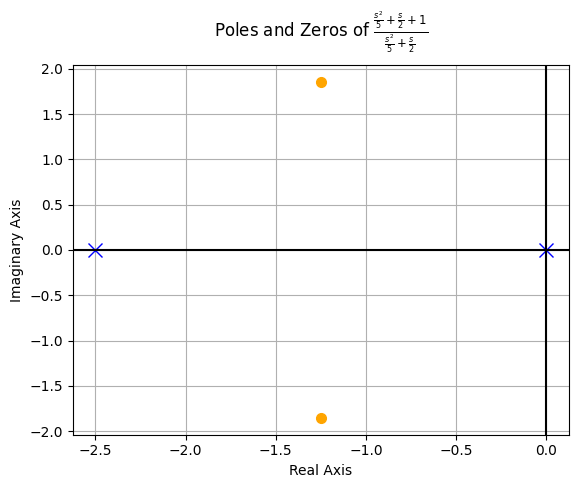

In [8]:
HRLC=control.TransferFunction(H.num.subs(RLC),H.den.subs(RLC),s)
control.pole_zero_plot(HRLC)

**Diagrama de bode**

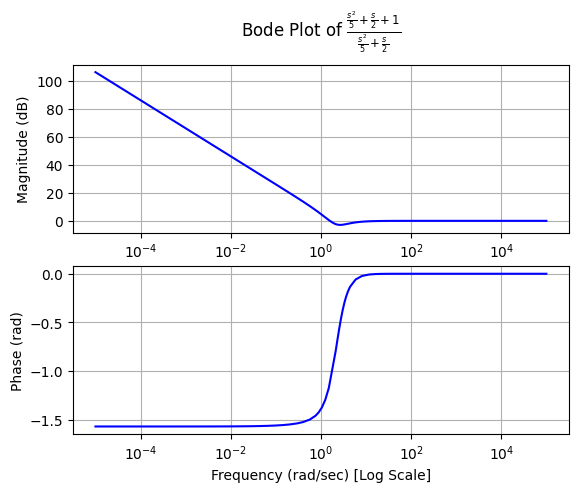

In [9]:
control.bode_plot(HRLC)

**Respuesta al impulso**

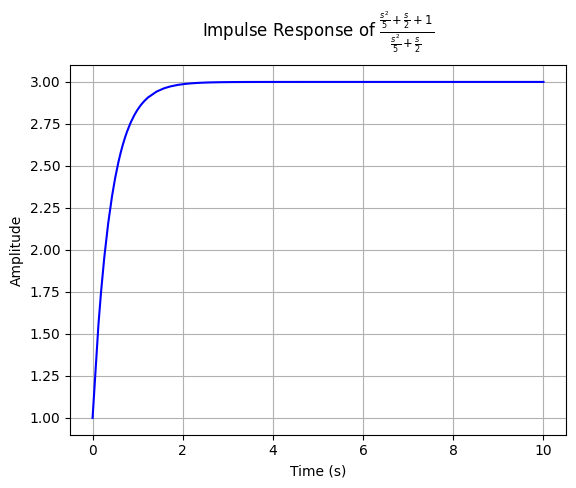

In [10]:
control.impulse_response_plot(HRLC)

**Respuesta al escalon**

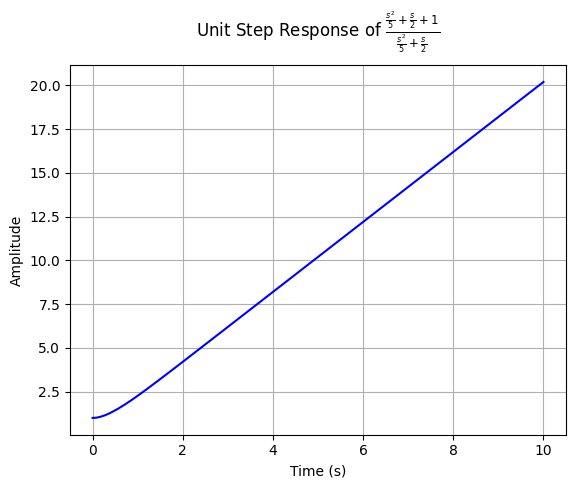

In [11]:
control.step_response_plot(HRLC)

**Respuesta a la rampa**

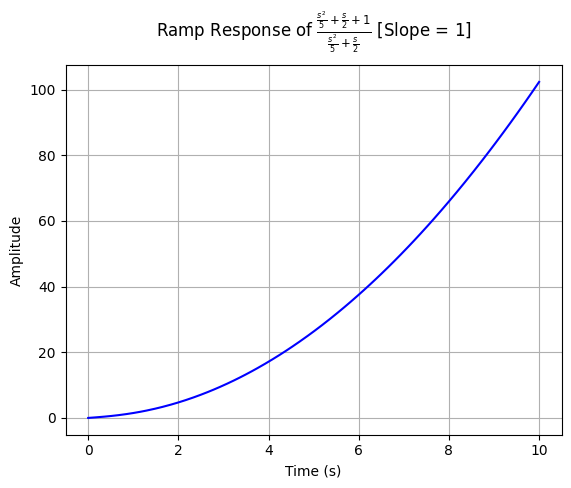

In [12]:
control.ramp_response_plot(HRLC)

1) A partir del modelado y desarrollos del cuaderno https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/7_An%C3%A1lisis%20de%20redes.ipynb , encuentre la función de transferencia en lazo abierto para un circuito RLC serie (fuente tensión de entrada, salida de tensión en capacitor), y un circuito RLC paralelo (fuente corriente de entrada, salida de corriente en inductor), incluyendo condiciones iniciales distintas de cero.

2) Con base al cuaderno https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/9_Pendulo_Elastico.ipynb ,plantee la equivalencia de los sistemas en el punto 1 a partir de un sistema masa resorte amortiguador, asuma condiciones iniciales cero.

3) Para los sistemas estudiados en los puntos 1 y 2, determine la forma canónica de segundo orden y escriba el factor de amortiguamiento, la frecuencia natural amortiguada, la frecuencia natural no amortiguada, el tiempo de máximo sobre impulso, y el tiempo de establecimiento, en función de los parámetros del sistema (RLC y k m c). Ver  https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/9_Pendulo_Elastico.ipynb)

4) Fije los valores de los párametros del sistema rlc paralelo, con condiciones iniciales cero, para simular la respuesta subamortiguada, sobreamortiguada, de amortiguamiento critico, oscilatoria e inestable, ante entrada escalón.

5) Para cada caso del punto 5, gráfique el diagrama de polos y ceros, diagrama de bode, respuesta impulso, respuesta escalón y respuesta a rampa (ver cuaderno https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/EjemploSLIT2OrdenCanonicoLaplace.ipynb).

6) Repital el punto 5) para el caso lazo cerrado, con A(s) = 1 en lazo de realimentación.

1) A partir del modelado y desarrollos del cuaderno https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/7_An%C3%A1lisis%20de%20redes.ipynb , encuentre la función de transferencia en lazo abierto para un circuito RLC serie (fuente tensión de entrada, salida de tensión en capacitor), y un circuito RLC paralelo (fuente corriente de entrada, salida de corriente en inductor), incluyendo condiciones iniciales distintas de cero.

Se reescriben los valores en terminos de la place: R=R, C=1/cS, L=Ls, y se aplica divisor de tension sobre el capacitor, para esto se debe hallar inmpedancia total.
luego se reescribe la encuacion dejando la relacion salida vs entrada: Vi/Vout.

In [24]:
#Función de transferencia RLC serie sobre C.

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
#Entrada de interés en Laplace

X = 1/s # Ajustar según tipo de entrada
H=control.TransferFunction(1,C*L*s**2+R*C*s+1,s) #Funcion de transferencia con la API de control, reemplazar  con la funcion para circuito en paralelo
#Hlc = H/(1+H) #para lazo cerrado

YS = H.num * X /H.den#función de transferencia del circuito multiplicada por X(s)
#Función de salida
YS

          1           
──────────────────────
  ⎛     2            ⎞
s⋅⎝C⋅L⋅s  + C⋅R⋅s + 1⎠

Se reescriben los valores en terminos de la place: R=R, C=1/cS, L=Ls, y se aplica divisor de corriente sobre el capacitor, para esto se debe hallar inmpedancia total. luego se reescribe la encuacion dejando la relacion salida vs entrada: Ii/Iout.

In [18]:
#Función de transferencia RLC paralelo sobre C.

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
#Entrada de interés en Laplace

X = 1/s # Ajustar según tipo de entrada
H=control.TransferFunction((R*L*C*s**2)+L*s+R,(R*L*C*s**2)+L*s,s) #Funcion de transferencia con la API de control, reemplazar  con la funcion para circuito en paralelo
#Hlc = H/(1+H) #para lazo cerrado

YP = H.num * X /H.den#función de transferencia del circuito multiplicada por X(s)
#Función de salida
YP

       2          
C⋅L⋅R⋅s  + L⋅s + R
──────────────────
  ⎛       2      ⎞
s⋅⎝C⋅L⋅R⋅s  + L⋅s⎠

 2) Con base al cuaderno https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/9_Pendulo_Elastico.ipynb ,plantee la equivalencia de los sistemas en el punto 1 a partir de un sistema masa resorte amortiguador, asuma condiciones iniciales cero.